In [1]:
import os
import pathlib
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
tf.keras.utils.get_file(
    'speech.zip',
    origin = 'http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip',
    extract = True,
    cache_dir=',', cache_subdir= 'data'
)

'/tmp\\.keras\\data\\speech.zip'

In [3]:
class_names = os.listdir("C:/tmp/.keras/data/mini_speech_commands")
class_names

['down', 'go', 'left', 'no', 'README.md', 'right', 'stop', 'up', 'yes']

In [4]:
class_names = [w for w in class_names if w != 'README.md']
class_names

['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']

In [5]:
import glob
filenames = glob.glob("C:/tmp/.keras/data/mini_speech_commands" + "/*/*")
filenames

['C:/tmp/.keras/data/mini_speech_commands\\down\\004ae714_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00b01445_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00f0204f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_4.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0137b3f4_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\014f9f65_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01b4757a_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01bb6a2a_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01bb6a2a_nohash_3.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01d22d03_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\02

In [6]:
# 마지막 10개 파일확인
filenames[-10:]

['C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_3.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fde2dee7_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fde2dee7_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fe1916ba_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fe5c4a7a_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ff21fb59_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ffd2ba2f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ffd2ba2f_nohash_2.wav']

In [7]:
# 앞에서 10개 파일확인
filenames[:10]

['C:/tmp/.keras/data/mini_speech_commands\\down\\004ae714_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00b01445_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00f0204f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_4.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0137b3f4_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\014f9f65_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01b4757a_nohash_0.wav']

In [8]:
# 리스트 랜덤 shuffle
filenames = tf.random.shuffle(filenames)
filenames[:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'C:/tmp/.keras/data/mini_speech_commands\\up\\b7a6f709_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\go\\e7ea8b76_nohash_7.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\up\\f33660af_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\go\\726382d6_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\down\\462e1919_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\left\\24ed94ab_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\up\\bbb2eb5b_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\left\\8dd24423_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\no\\b97c9f77_nohash_2.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\yes\\2275edbb_nohash_0.wav'],
      dtype=object)>

In [9]:
# 데이터 확보
dir_path = 'C:/tmp/.keras/data/mini_speech_commands'
for dirname in class_names:
    target = dir_path + f"/{dirname}"
    print(f"{dirname}'s count = {len(os.listdir(target))}")

down's count = 1000
go's count = 1000
left's count = 1000
no's count = 1000
right's count = 1000
stop's count = 1000
up's count = 1000
yes's count = 1000


In [10]:
# 데이터 분할 8:1:1로 분할  >>  훈련 : 검증 : 테스트
split8 = int(len(filenames)*0.8)
split1 = int((len(filenames)-split8)/2)
train_files = filenames[: split8]
val_files = filenames[split8: split8+split1]
test_files = filenames[-split1:]

In [11]:
len(train_files), len(val_files), len(test_files), len(filenames)

(6400, 800, 800, 8000)

In [12]:
# 오디오 파일을 수치 데이터로 변경하기
# 오디오 : 초당 샘플링 --> 시계열 데이터 --> LSTM

# 예시1
file = tf.io.read_file('C:/tmp/.keras/data/mini_speech_commands/down/00b01445_nohash_1.wav')
audio, sample_rate = tf.audio.decode_wav(contents=file)
audio.shape

TensorShape([16000, 1])

In [13]:
audio[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00161743], dtype=float32)>

In [14]:
print(tf.squeeze(audio).shape)
print(tf.squeeze(audio)[0])

(16000,)
tf.Tensor(0.0016174316, shape=(), dtype=float32)


In [15]:
# 디렉토리명을 레이블정보로 취득

In [16]:
# raw데이터인 WAV 오디오 파일을 수치 데이터로 전처리하는 함수
def decode_audio(binary):
    audio, sample_rate = tf.audio.decode_wav(contents=binary)
    return tf.squeeze(audio, axis = -1)    

In [17]:
def get_label(file_path):
    parts = tf.strings.split(input=file_path, sep = os.path.sep)
    return parts[-2]

In [18]:
a = tf.strings.split(input='C:\tmp\.keras\data\mini_speech_commands\down\00b01445_nohash_1.wav', sep=os.path.sep)
a
# 구분자를 /로 할 경우 /같은 문자로 인식하기에
# 파일불러올때와는 다르게 \로 해주었음
# a[-2]

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'C:\tmp', b'.keras', b'data', b'mini_speech_commands',
       b'down\x00b01445_nohash_1.wav'], dtype=object)>

In [19]:
def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary = tf.io.read_file(file_path)
    wave_form = decode_audio(audio_binary)
    return wave_form, label

In [20]:
# get_waveform_and_label을 이용해서 훈련셋을 만든다
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=tf.data.AUTOTUNE
); waveform_ds

# files_ds.take(0)
# files_ds.take(9)
# waveform_ds.take(9)

<ParallelMapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

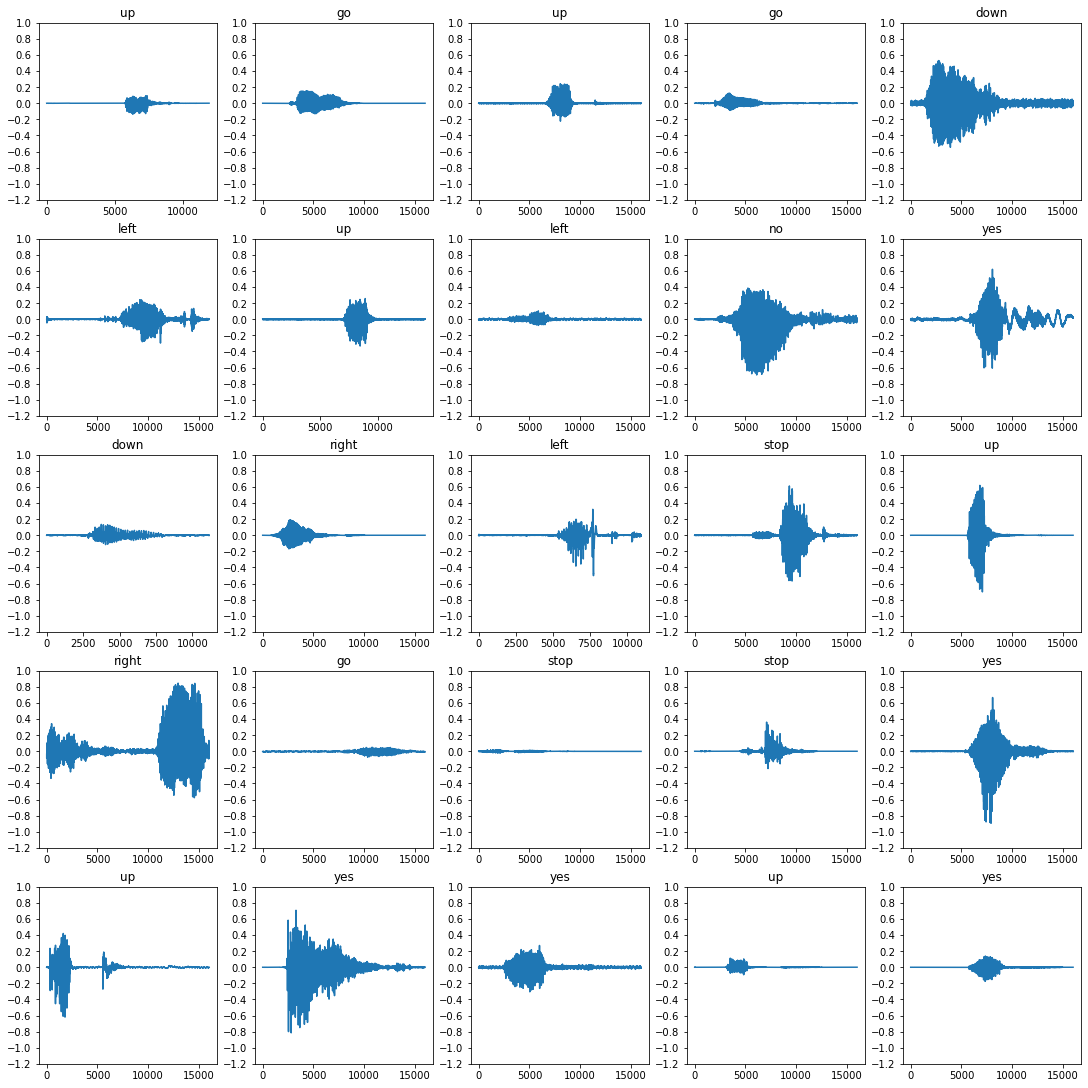

In [21]:
# 오디오 파형 시각화
rows, cols = 5,5
n = rows*cols
fig, ax = plt.subplots(rows,cols,figsize=(15,15), constrained_layout = True)
for i, (audio,label) in enumerate(waveform_ds.take(n)):
    ax[i//cols, i%cols].plot(audio.numpy())
    ax[i//cols, i%cols].set_yticks(np.arange(-1.2,1.2,0.2))
    label = label.numpy().decode('utf-8')
    ax[i//cols, i%cols].set_title(label)
plt.show()

In [22]:
# 파형의 스펙트럼 변경
# 16,000 sample 16kHz 보다 작은 오디오 데이터는 zero-padding을 적용
# 시간영역 신호 끝에 0을 추가하여 길이를 늘리는 작업
def get_spectrogram(waveform):
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros([input_len] - tf.shape(waveform), dtype = tf.float32)
    waveform = tf.cast(waveform,dtype = tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)
    # waveform형태의 데이터를 스펙트럽 형태로 변환
    spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[...,tf.newaxis]
    return spectrogram

In [23]:
# 데이터 탐색, 파형과 스펙트럼의 모양을 print하고 원본 오디오를 재생
for waveform, label in waveform_ds.take(10):
    # 숫자를 바꿔가며 파형확인 가능 1 ~~ 
    label = label.numpy().decode('utf-8')
    spectrogram = get_spectrogram(waveform)

print(f"label : {label}")
print(f"waveform shape : {waveform.shape}")
print(f"spectrogram shape : {spectrogram.shape}")
display.display(display.Audio(waveform,rate = 16000))

label : yes
waveform shape : (16000,)
spectrogram shape : (124, 129, 1)


In [24]:
# 스펙트럼 표시 함수
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        spectrogram = np.squeeze(spectrogram, axis = -1)
    log_spec = np.log(spectrogram.T+np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0,np.size(spectrogram), num = width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X,Y,log_spec)

C:\Users\user\AppData\Local\Temp/ipykernel_10608/558935533.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X,Y,log_spec)


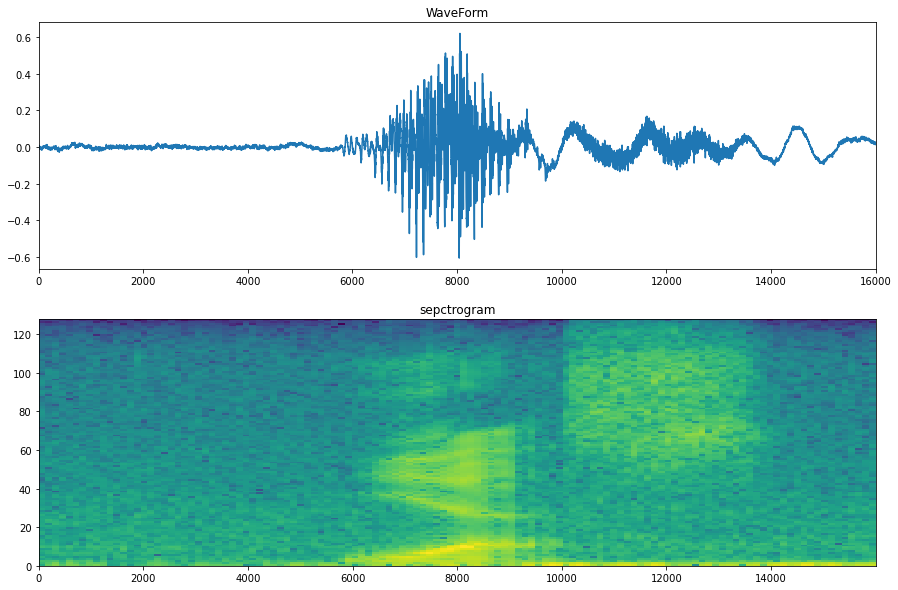

In [25]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
timescale = np.arange(waveform.shape[0])
ax[0].plot(timescale, waveform.numpy())
ax[0].set_title('WaveForm')
ax[0].set_xlim([0,16000])

plot_spectrogram(spectrogram.numpy(), ax[1])
ax[1].set_title('sepctrogram')
plt.show()

In [26]:
# 데이터를 스펙트럼으로 변환하고 레이블을 id로 하는 데이터 셋
commands = class_names  # 맨 위의 class_names

def get_spectrogram_and_label_id(audio,label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == commands)
    return spectrogram, label_id

In [27]:
spectrogram_ds = waveform_ds.map(
    map_func = get_spectrogram_and_label_id,
    num_parallel_calls=tf.data.AUTOTUNE
)

C:\Users\user\AppData\Local\Temp/ipykernel_10608/558935533.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X,Y,log_spec)


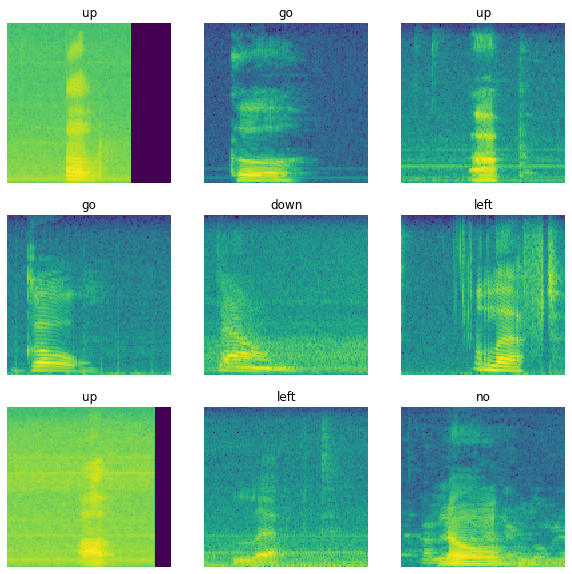

In [28]:
rows, cols = 3,3
n = rows*cols
fig,ax = plt.subplots(rows,cols,figsize=(10,10))
for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    plot_spectrogram(spectrogram.numpy(),ax[i//cols, i%cols])
    ax[i//cols, i%cols].set_title(commands[label_id.numpy()])
    ax[i//cols, i%cols].axis('off')
plt.show()

In [29]:
# 모델을 빌드하고 학습 : 전처리
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func = get_waveform_and_label,
        num_parallel_calls=tf.data.AUTOTUNE
    )
    output_ds.map(
        map_func = get_spectrogram_and_label_id,
        num_parallel_calls=tf.data.AUTOTUNE
    )
    return output_ds

In [30]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [31]:
# 하이퍼 파라미터
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [32]:
# cache 기능을 추가하여 모델훈련시간을 줄여줌
# 모델을 훈련할 때 동시에 읽기 작업도 병행
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

In [33]:
# CNN을 사용
# Resizing : 모델이 빠르게 학습할 수 있도록 입력을 다운샘플링
# Normalization : 평균과 표준편차를 기반으로 정규화

In [34]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
num_labels = len(commands)

In [35]:
norm_layer = layers.Normalization()
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label : spec))

In [36]:
model = models.Sequential(
    [
        layers.Input(shape = input_shape),
        layers.Resizing(32,32),
        norm_layer,
        layers.Conv2D(32,3, activation = 'relu'),
        layers.Conv2D(64,3, activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(num_labels)
    ]

)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [38]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy']
             )

In [39]:
# # 일단 오류...
# history = model.fit(train_ds, validation_data = val_ds, epochs=10,
#                     callbacks=tf.keras.callbacks.EarlyStopping(verbose=1,patience=2))